In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
%matplotlib inline


In [2]:
def make_points(row):
   return Point(row.Longitude, row.Latitude)

In [3]:
bio = pd.read_csv("species.csv",low_memory=False)
state_data = gpd.read_file('states/states.shp')
parks = pd.read_csv("parks.csv")
points = parks.apply(make_points,axis=1)
parks_map = gpd.GeoDataFrame(parks, geometry=points)
parks_map.crs = ('epsg:4326')
state_data.crs = ('epsg:4326')
state_parks = gpd.sjoin(parks_map,state_data, how ='inner',op = 'within')
state_data.set_index('STATE_NAME', inplace=True)

In [4]:
bio.drop(columns=['Unnamed: 13'])
bio.loc[(bio["Conservation Status"].isnull()),["Conservation Status"]] = 'Regular'
state_data['No. of Parks'] = state_parks['STATE_NAME'].value_counts()
state_data.loc[(state_data["No. of Parks"].isnull()),["No. of Parks"]] = 0

# First lets get the number of parks in each state in this dataset

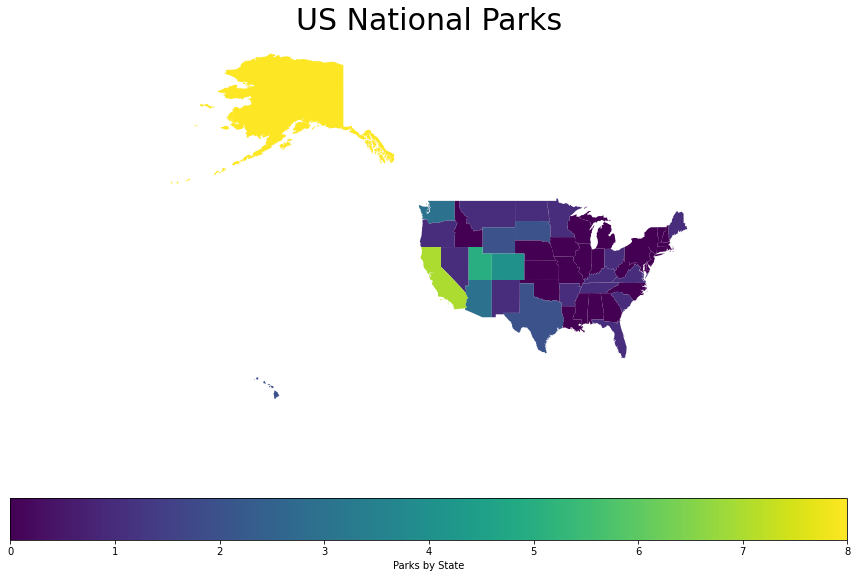

In [5]:
ax=state_data.plot(column='No. of Parks',
                   figsize=(15,10),
                   legend =True,
                   legend_kwds={'label': 'Parks by State','orientation':'horizontal'},
                   
                  )
ax.axis('off')
ax.set_title("US National Parks", fontsize =30);

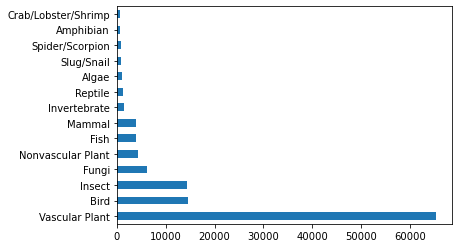

In [6]:
bio["Category"].value_counts().plot.barh();

## this is markdown

## We are checking the number of endangered species

In [7]:
endangered_park = bio['Conservation Status'] == 'Endangered'
bio[endangered_park]["Species ID"].count()

374

# Here we are looking at the number of endangered species per park

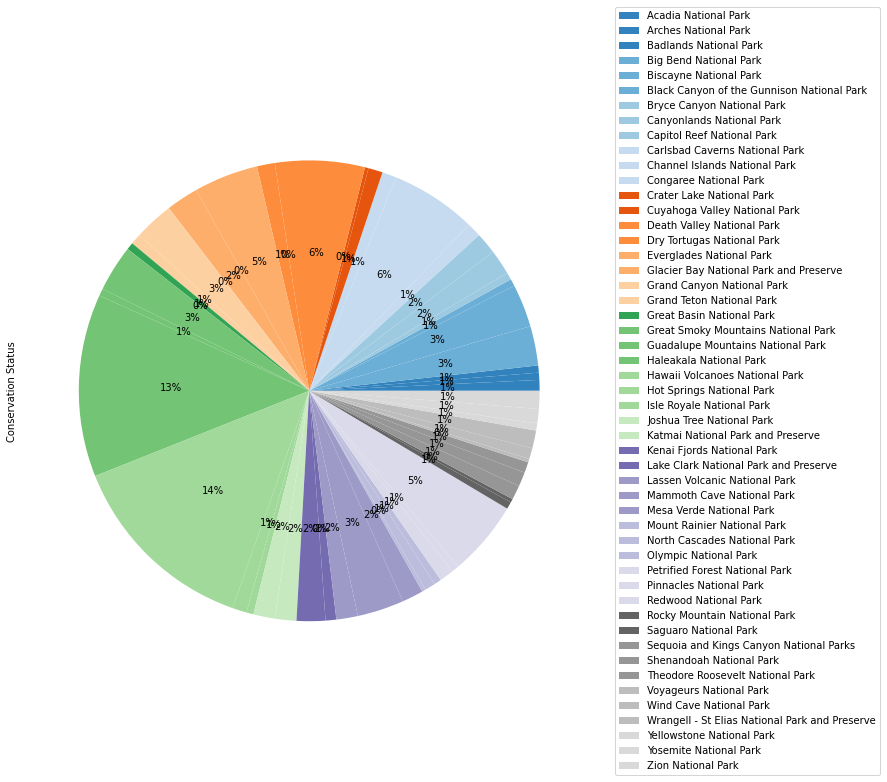

In [68]:
fig3,ax3 = plt.subplots(figsize=(10,10))
fig3.subplots_adjust(0.2,0,1,1)
spec_park = bio.groupby(["Park Name"])
x = spec_park['Conservation Status'].apply(lambda x: x.str.contains("Endangered").sum() )

x.plot.pie(labeldistance=None, cmap='tab20c',autopct='%1.0f%%')
plt.legend(loc='right',bbox_to_anchor=(1,0,0.5,1), );

## What endangered species are unique to a park?

In [96]:
bio[endangered_park].duplicated().value_counts()

False    374
dtype: int64

### wow it seems every endangered species is unique to each park and there is no overlap in that sense

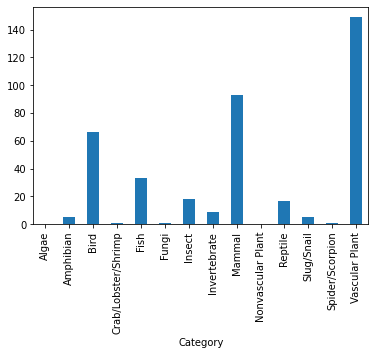

In [14]:
spec_species = bio.groupby(["Category"])
spec_species['Conservation Status'].apply(lambda x: x.str.contains("Endangered").sum() ).plot.bar();